# Multi-core bash

## Transform a simple "for loop" in multicore "for loop"
**For Loop**

You may run the full process by applying the loop in the usual way: 

In [12]:
%%bash 
cd /media/sf_LVM_shared/my_SE_data/exercise
time (
    
for file in geodata/LST/LST_MOYDmax_month?.tif; do
echo $file
filename=$(basename  $file .tif)
gdal_translate -co COMPRESS=DEFLATE -co ZLEVEL=9 -r average -tr 0.0008333333333333 0.0008333333333333 $file geodata/LST/${filename}_10k.tif
done

)

geodata/LST/LST_MOYDmax_month1.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.
geodata/LST/LST_MOYDmax_month2.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.
geodata/LST/LST_MOYDmax_month3.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.
geodata/LST/LST_MOYDmax_month4.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.
geodata/LST/LST_MOYDmax_month5.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.
geodata/LST/LST_MOYDmax_month6.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.
geodata/LST/LST_MOYDmax_month7.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.
geodata/LST/LST_MOYDmax_month8.tif
Input file size is 1080, 840
0...10...20...30...40...50...60...70...80...90...100 - done.



real	0m39.567s
user	0m33.485s
sys	0m4.028s


In this way only one processor will be used. The others will be just sleeping or eventually swap when the process is applied to another tif.

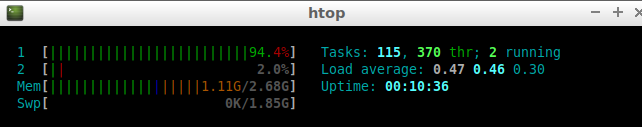

In [9]:
from IPython.display import Image
Image("../images/xargs_core1.png")

**xargs loop - passing 1 argument**

The xargs command allows to run a process splitting the task to several processors numerically defined by the user: 

In [11]:
%%bash
cd /media/sf_LVM_shared/my_SE_data/exercise
time (

ls geodata/LST/LST_MOYDmax_month?.tif | xargs -n 1 -P 2  bash -c $'
file=$1
filename=$(basename  $file .tif)
gdal_translate -co COMPRESS=DEFLATE -co ZLEVEL=9  -r average -tr 0.0008333333333333  0.0008333333333333 $file  geodata/LST/${filename}_10k.tif
' _ 

)

Input file size is 1080, 840
0Input file size is 1080, 840
0......1010......20.20...30...30.....4040......5050......6060......70.70.....8080......9090......100 - done.
100 - done.
Input file size is 1080, 840
0Input file size is 1080, 840
0.....10..10.....20.20....30..30.....4040......5050......6060......7070.....80.80......9090......100 - done.
100 - done.
Input file size is 1080, 840
0.Input file size is 1080, 840
0....10...10...20...20..30..30......4040......5050......6060......70.70....80.80......9090......100 - done.
Input file size is 1080, 840
0...10100 - done.
..Input file size is 1080, 840
0..20....10.30......20...3040....40....50..50....60...60...70..70....80..80....90..90.....100 - done.
Input file size is 1080, 840
0...10.100 - done.
..20...30...40...50...60...70...80...90...100 - done.



real	0m24.321s
user	0m36.641s
sys	0m3.390s


- The -n option identifies the argument. The argument is the variable imported inside the loop.
- The argument is identifies with \\$1 and for a better understanding renamed to file (file=\\$1).
- The -P option identify the processors (in this case 2) used to run the full line inside -c $' ..... ' _

For example, the following picture shows the processing time during the xargs loop. As you can see two processors are running simultaneously, and the whole processing time is shorter. 

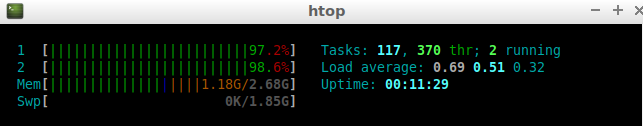

In [14]:
from IPython.display import Image
Image("../images/xargs_core2.png")

**xargs loop - passing 2 arguments**

It also possible to pass more than one argument inside xargs. In this case we create a table with 2 columns: filename and resolution.

In [3]:
%%bash 
for file in  geodata/LST/LST_MOYDmax_month?.tif ; do 
    for res in 0.0008  0.0010 ; do   
         echo $file $res 
    done
done  > geodata/LST/file_res.txt

In [4]:
cat geodata/LST/file_res.txt

geodata/LST/LST_MOYDmax_month1.tif 0.0008
geodata/LST/LST_MOYDmax_month1.tif 0.0010
geodata/LST/LST_MOYDmax_month2.tif 0.0008
geodata/LST/LST_MOYDmax_month2.tif 0.0010
geodata/LST/LST_MOYDmax_month3.tif 0.0008
geodata/LST/LST_MOYDmax_month3.tif 0.0010
geodata/LST/LST_MOYDmax_month4.tif 0.0008
geodata/LST/LST_MOYDmax_month4.tif 0.0010
geodata/LST/LST_MOYDmax_month5.tif 0.0008
geodata/LST/LST_MOYDmax_month5.tif 0.0010
geodata/LST/LST_MOYDmax_month6.tif 0.0008
geodata/LST/LST_MOYDmax_month6.tif 0.0010
geodata/LST/LST_MOYDmax_month7.tif 0.0008
geodata/LST/LST_MOYDmax_month7.tif 0.0010
geodata/LST/LST_MOYDmax_month8.tif 0.0008
geodata/LST/LST_MOYDmax_month8.tif 0.0010
geodata/LST/LST_MOYDmax_month9.tif 0.0008
geodata/LST/LST_MOYDmax_month9.tif 0.0010


Now the table is used to feed xargs

In [5]:
%%bash
cd /media/sf_LVM_shared/my_SE_data/exercise

cat geodata/LST/file_res.txt | xargs -n 2 -P 2  bash -c $'
file=$1
res=$2
filename=$(basename  $file .tif)
gdal_translate -co COMPRESS=DEFLATE -co ZLEVEL=9  -r average -tr $res $res $file  geodata/LST/${filename}_${res}.tif
' _ 


Input file size is 1080, 840
0Input file size is 1080, 840
0......1010.....20...20..30.....40.30...50....40.60......7050.....80....6090.....70...80...90....100 - done.
Input file size is 1080, 840
0...10...20...30...40...50...100 - done.
Input file size is 1080, 840
0...1060...20...30....40...50.....6070.....70...80..80.....90.90.....100 - done.
Input file size is 1080, 840
0...10..100 - done.
.20.Input file size is 1080, 840
0....30.10.....20...30....40...50.40...60.....5070......8060.....90...70...80...90....100 - done.
Input file size is 1080, 840
0...10...20...30...40...50100 - done.
.Input file size is 1080, 840
0....10...20...30....40...50.60..60......7070.....80...80..90....90....100 - done.
Input file size is 1080, 840
0...10...20...30...40100 - done.
Input file size is 1080, 840
0...10....20...30...40....50...50.60.....70...60..80.....7090.....80...90....100 - done.
Input file size is 1080, 840
0...10...20...30...40...100 - done.
Input file size is 1080, 840
0.50..10...20....3